# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [4]:
#Your code here
colsb4 = list(df.columns.values)
colsaftr = {val.replace(' ',''):val.lower().replace(' ','') for val in colsb4}
df.rename(columns=colsaftr,inplace=True)
df.head(4)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314


# Change the Index to be the Line Names

In [5]:
#Your code here
df.set_index('linename', inplace=True)
df.head(4)

,c/a,unit,scp,station,division,date,time,desc,entries,EXITS
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314


# Painstakingly change the index back

In [6]:
# Your code here
df.reset_index(inplace=True)
df.head(4)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,EXITS
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [7]:
# Your code here
stations = list(set(df.station.tolist()))
sta_dic = {}
for sta in stations:
    cnt = df.loc[df.station == sta].station.count()
    sta_dic[sta] = cnt
for i, row in enumerate(df.iterrows()):
    df.loc[i,'Num_Lines'] =  sta_dic[df.loc[i].station]
      
df.sort_values(by=['Num_Lines'], ascending=False)
print(df.head(4))

  linename   c/a  unit       scp station division        date      time  \
0  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
1  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
2  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   
3  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  12:00:00   

      desc  entries  \
0  REGULAR  6736067   
1  REGULAR  6736087   
2  REGULAR  6736105   
3  REGULAR  6736180   

   EXITS                                                                 \
0                                            2283184                      
1                                            2283188                      
2                                            2283229                      
3                                            2283314                      

   Num_Lines  
0     2229.0  
1     2229.0  
2     2229.0  
3     2229.0  


## Write a function to clean a column name.

In [8]:
def clean(col_name):
    cleaned = col_name.replace(' ','').replace("'",'').replace(':','_').replace(';','_').replace('-','_').replace('__',"").lower()
    #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [9]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [10]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')
df['dow'] = df.date.dt.day_name()
df['traffic'] = df.entries - df.exits
df.head(4)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,dow,traffic
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,2229.0,Saturday,4452883
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,2229.0,Saturday,4452899
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,2229.0,Saturday,4452876
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,2229.0,Saturday,4452866


['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


TypeError: object of type 'NoneType' has no len()

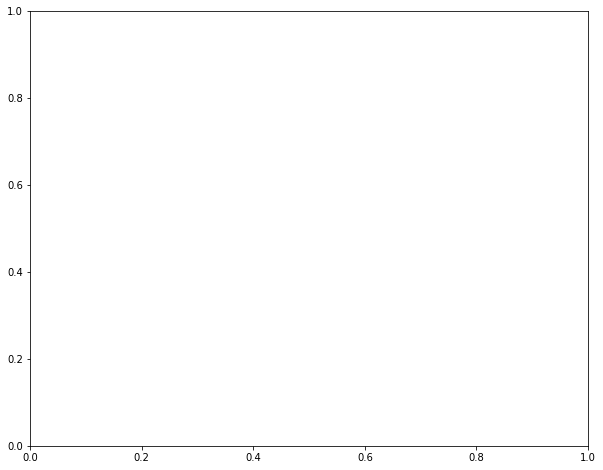

In [39]:
x = df.groupby(['dow'])['traffic'].sum()
x.head(7)
dow =x.index.values.tolist()
idow = list(range(1,len(dow)+1))
print(dow)
plt.figure(figsize=(10,8))
plt.xticks(labels=dow)
plt.xlabel('Days of the Week')
plt.ylabel('Traffic')
plt.bar(idow, x.traffic, align='center')
plt.show()
# df.entries.value_counts?

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [6]:
#Your code here
df.dow.value_counts?

# Drop a couple of columns

In [ ]:
# Your code here